# Relax Inc. Take Home Challenge
The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one
of 5 values:
* PERSONAL_PROJECTS: invited to join another user's
personal workspace
* GUEST_INVITE: invited to an organization as a guest
(limited permissions)
* ORG_INVITE: invited to an organization (as a full member)
* SIGNUP: signed up via the website
* SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
* enabled_for_marketing_drip: whether they are on the regular
marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).
2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day
that a user logged into the product.
Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .
We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np
from datetime import datetime
%matplotlib inline
import seaborn as sns
import datetime
from datetime import timedelta

In [2]:
# Load Files into dataframes
users = pd.read_csv('takehome_users.csv', encoding='latin-1',parse_dates=True)
usage = pd.read_csv('takehome_user_engagement.csv', parse_dates=True,index_col='time_stamp')

In [3]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
usage

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


#### Label users as "adopted user"

In [7]:
def label_adopted(x):    
    "takes a users input and returns whether or not they have been active within any 7-day period"
    df = usage.loc[usage['user_id'] == x] #select out rows of this user
    df = df.resample('D').mean().dropna() #resample to show if active in a day. .mean() is just of 1
    adopted = 0
    for i in range(len(df)-2): #loop over active days till the second to last day
        if df.index[i + 2] - df.index[i] <= timedelta(days=7): # difference between every 1st and 3rd day
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [8]:
#apply to user df to label users as adopted=true 
users['adopted_user'] = users['object_id'].apply(label_adopted)

In [9]:
print(sum(users['adopted_user']))
print(sum(users.adopted_user)/len(users.adopted_user))

1656
0.138


It looks like we have 1656 ctive users or around 14%  of users are active in the dataset. Now we have our target variable lets do some more cleaning.

In [10]:
# set creation_time
users.creation_time = pd.to_datetime(users.creation_time)
# fill missing values
users['invited_by_user_id'] = users['invited_by_user_id'].fillna('none')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  object        
 10  adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)


In [11]:
#last_session_creation_time is a unix time stamp, so use map to convert to datetime
users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'),
                                                                              na_action='ignore')
#now set that to datetime
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])
#subtract to find time active
users['usage_length'] = users['last_session_creation_time'] - users['creation_time']
# convert to int in order to use in model
users['usage_length'] = [x.total_seconds() for x in users['usage_length']]

In [12]:
users['usage_length'] = users['usage_length'].fillna(0)

## Predictive Modeling

Because of the nature of this problem we want to choose a model that has a high level of interpretability. Relax wants to identify which factors predict future user adoption . A random forest classifier allows us to understand more about the relationship that features have with the target and the degree of influence they have.

In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

In [14]:
# one hot encode categorical variables
df = pd.get_dummies(users)

In [15]:
# separate dependent and independent variables 
X = df.drop(['adopted_user','last_session_creation_time','creation_time','object_id'], axis=1)
y = df.adopted_user.values
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [ ]:
# Random forest Classifier
rf = RandomForestClassifier() 

#specify a parameter grid to search over
parameters_rf = {
                 'n_estimators': [50, 100],
                 'max_depth': [3, 10, None],
}
rf_cv = RandomizedSearchCV(rf, parameters_rf,verbose=3, n_jobs=-1,cv=5) #specify GridSearchCV object

rf_cv.fit(X_train, y_train) #fit to training data
# Report the best parameters and the corresponding score
print("Best CV params", rf_cv.best_params_)
print("Best CV accuracy", rf_cv.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", rf_cv.score(X_test, y_test))

In [54]:
# Build random Forest model
rf = RandomForestClassifier() 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf_p = rf.predict_proba(X_test)[:,1]
print(classification_report(y_test,y_pred_rf))
print(f"ROC_AUC:{roc_auc_score(y_test,y_pred_rf_p)}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2582
           1       0.95      0.85      0.90       418

    accuracy                           0.97      3000
   macro avg       0.96      0.92      0.94      3000
weighted avg       0.97      0.97      0.97      3000

ROC_AUC:0.9833430003076136


Considering random forests are better at exctracting feature importance over predictive power, these results are very impressive. We have made sure the model isn't over fit by using cross validation as well. 


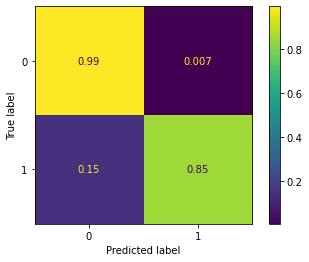

<Figure size 576x576 with 0 Axes>

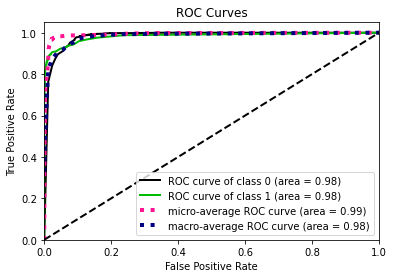

In [67]:
# Plot Confsion Matrix and ROC Curve
plot_confusion_matrix(rf, X_test, y_test,normalize='true')
plt.figure(figsize=(8,8))
y_pred_rf_p = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_rf_p)
plt.show()

### Feature Importance

10


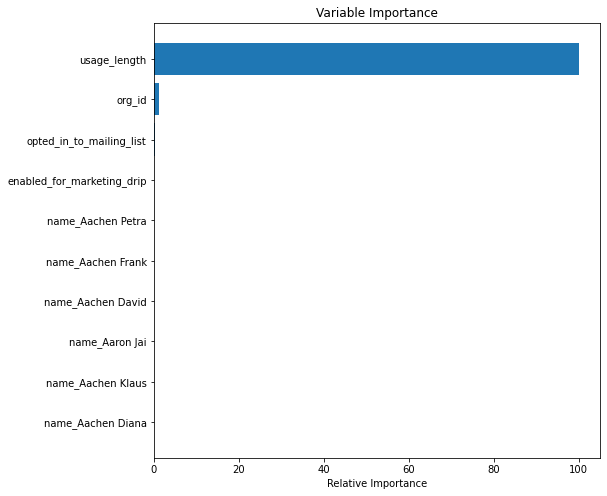

In [57]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:10]
sorted_idx = np.argsort(feature_importance)[:10]
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In the graph above, usage length is by far the best indicator for whether a user becomes an "adopted user". Surprisingly, subscribing to the mailing list and marketing ads are not an important factor in determining adopted users.  

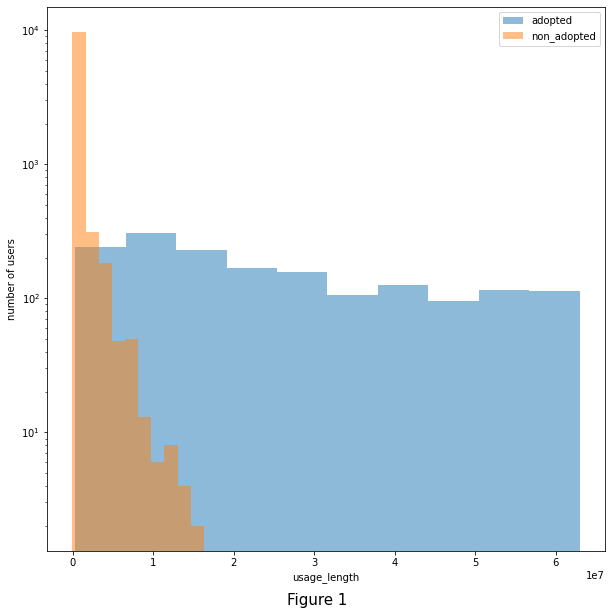

In [59]:
adopted = users[users['adopted_user']==1]
non_adopted = users[users['adopted_user']==0]
plt.figure(figsize=(10,10))
plt.hist(adopted['usage_length'],label='adopted',alpha=.5)
plt.hist(non_adopted['usage_length'],label='non_adopted',alpha=.5)
plt.legend(loc='best')
plt.yscale('log')
plt.xlabel('usage_length')
plt.ylabel('number of users')
txt= "Figure 1"
plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=15)
plt.show()

## Conclusions & Insights

A random forest model based on the dataset can predict user adoption with >97% accuracy. The most important features are the length the user has been using the product and the organization the user belongs to. 
Based on these findings, I would recommend encouraging already adopted users to reach out to users within their organization to start using their software again. 
Detailed user response data, such as whether users responded to certain marketing ads, or whether or not users clicked a link on the mailing list would be useful in determining an effective way to attract adopted users. More detailed information about the organizations would be useful in finding out what type of organization should Relax Inc. target for growth of adopted users.
